# Data Exploration - Light



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
from sklearn import preprocessing


%matplotlib inline

plt.style.use('fivethirtyeight')


In [2]:
nurve = pd.read_csv('../data/nUrve_master_0321.csv')
nurve_light = nurve[['GPS_DATETIMESTAMP', 'AMB_Lux']]

#Convert string to timestamp
nurve_light['GPS_DATETIMESTAMP'] = pd.to_datetime(nurve_light['GPS_DATETIMESTAMP'])

/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (13,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Library/Python/2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
nurve_light = nurve_light.drop_duplicates()

In [4]:
#Getting timestamp for a finer plot
nurve_light['timestamp'] = (nurve_light.GPS_DATETIMESTAMP.apply(lambda x: x.timetuple())).apply(lambda y: time.mktime(y))

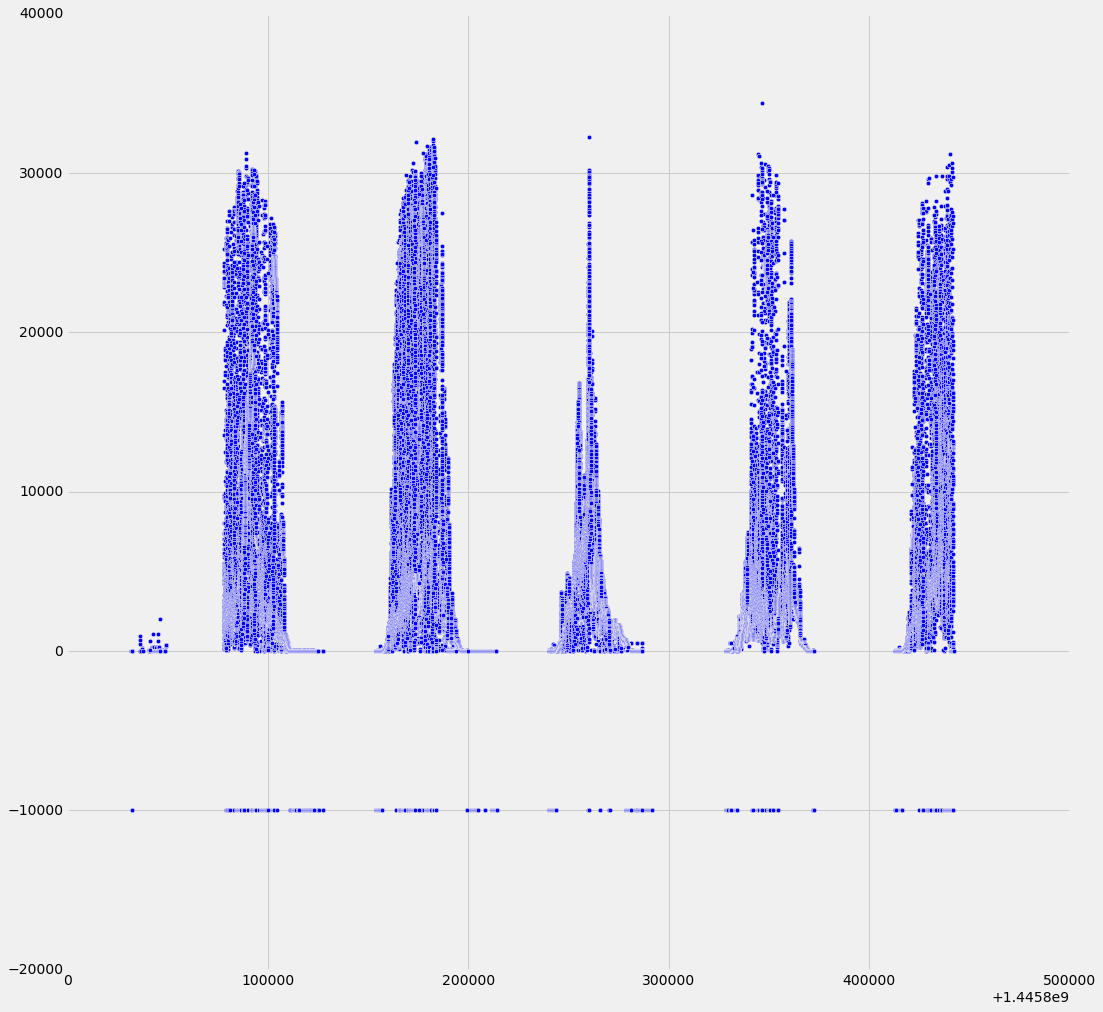

In [5]:
fig, ax = plt.subplots(figsize = (16,16));
plt.scatter(nurve_light['timestamp'], nurve_light['AMB_Lux']);

In [6]:
nurve_light['timetuple'] = nurve_light.GPS_DATETIMESTAMP.apply(lambda x: x.timetuple())

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(nurve_light['AMB_Lux'])
nurve_light['norm_AMB_Lux'] = pd.DataFrame(x_scaled)


/Users/vipassana/cusp/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/vipassana/cusp/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [13]:
std_scaler = preprocessing.StandardScaler()
x_scaled = std_scaler.fit_transform(nurve_light['AMB_Lux'])
nurve_light['std_norm_AMB_Lux'] = pd.DataFrame(x_scaled)


/Users/vipassana/cusp/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/vipassana/cusp/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


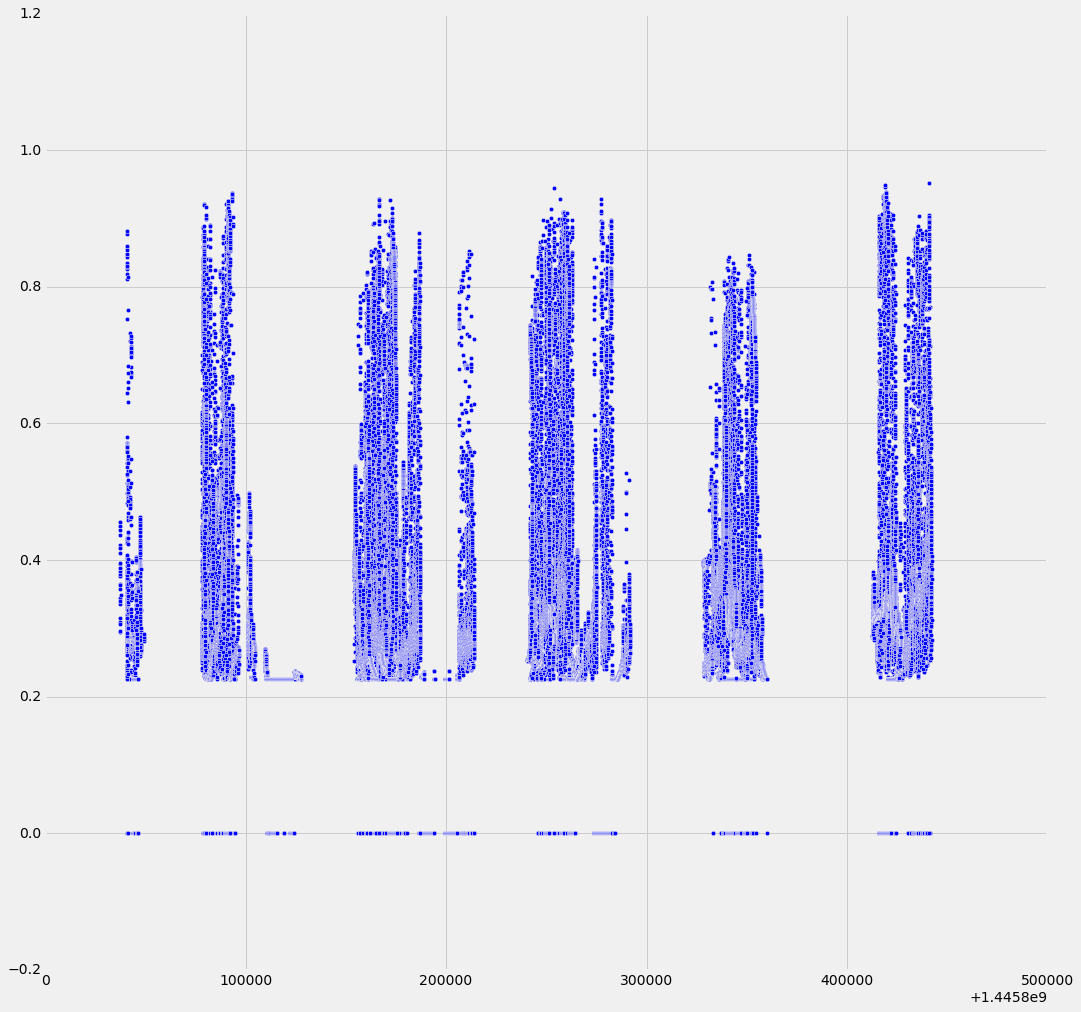

In [14]:
fig, ax = plt.subplots(figsize = (16,16));
plt.scatter(nurve_light['timestamp'], nurve_light['norm_AMB_Lux']);

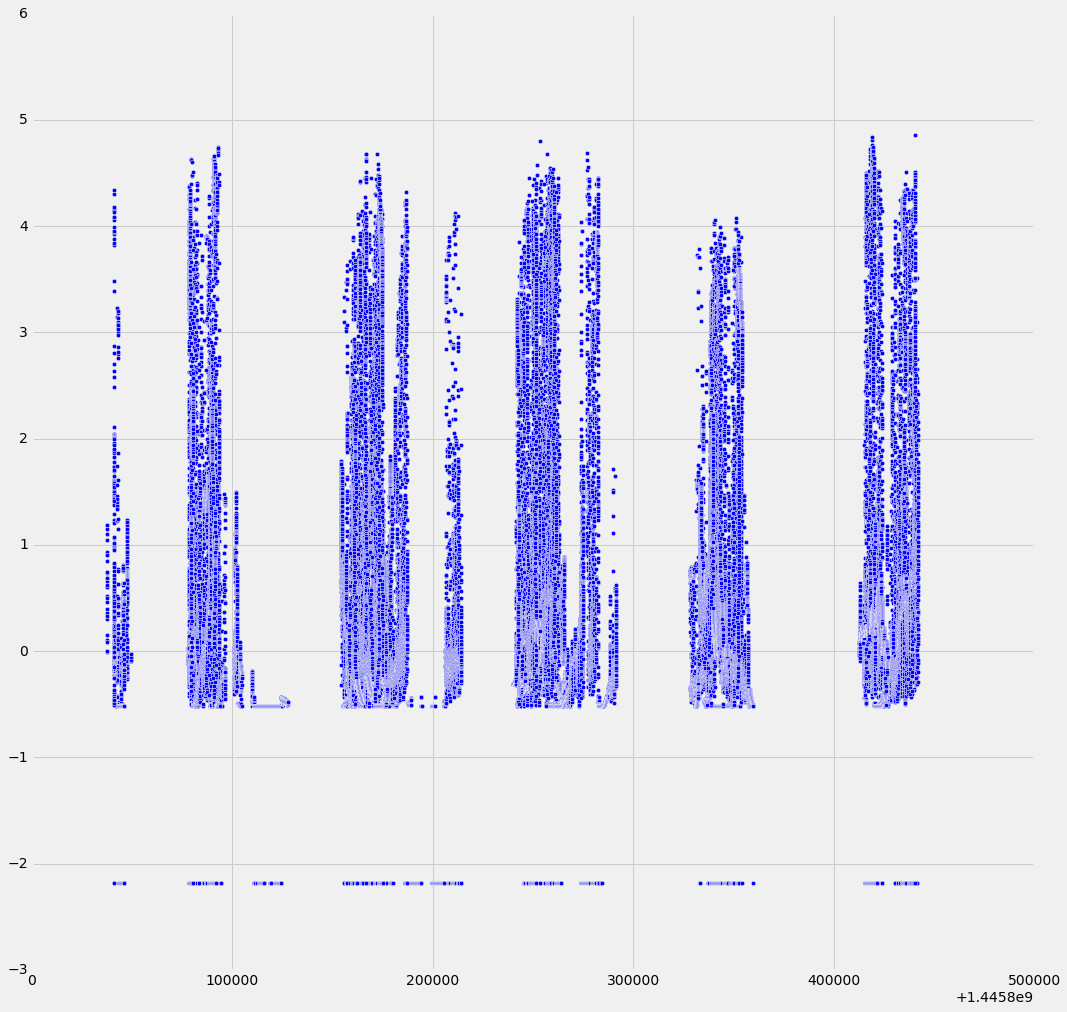

In [15]:
fig, ax = plt.subplots(figsize = (16,16));
plt.scatter(nurve_light['timestamp'], nurve_light['std_norm_AMB_Lux']);